In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from python_files.Vorverarbeitung import Vorverarbeitung, Spalten

In [2]:
data_train= pd.read_csv('dataset/manipuliert/adult_train.csv')
data_test= pd.read_csv('dataset/adult_test.csv')
data_original = pd.read_csv('dataset/adult.csv')

In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36177 entries, 0 to 36176
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             36177 non-null  object
 1   workclass       36177 non-null  object
 2   fnlwgt          36177 non-null  int64 
 3   education       36177 non-null  object
 4   education-num   36177 non-null  int64 
 5   marital-status  36177 non-null  object
 6   occupation      36177 non-null  object
 7   relationship    36177 non-null  object
 8   race            36177 non-null  object
 9   sex             36177 non-null  object
 10  capital-gain    36177 non-null  int64 
 11  capital-loss    36177 non-null  int64 
 12  hours-per-week  36177 non-null  int64 
 13  native-country  36177 non-null  object
 14  income          36177 non-null  int64 
dtypes: int64(6), object(9)
memory usage: 4.1+ MB


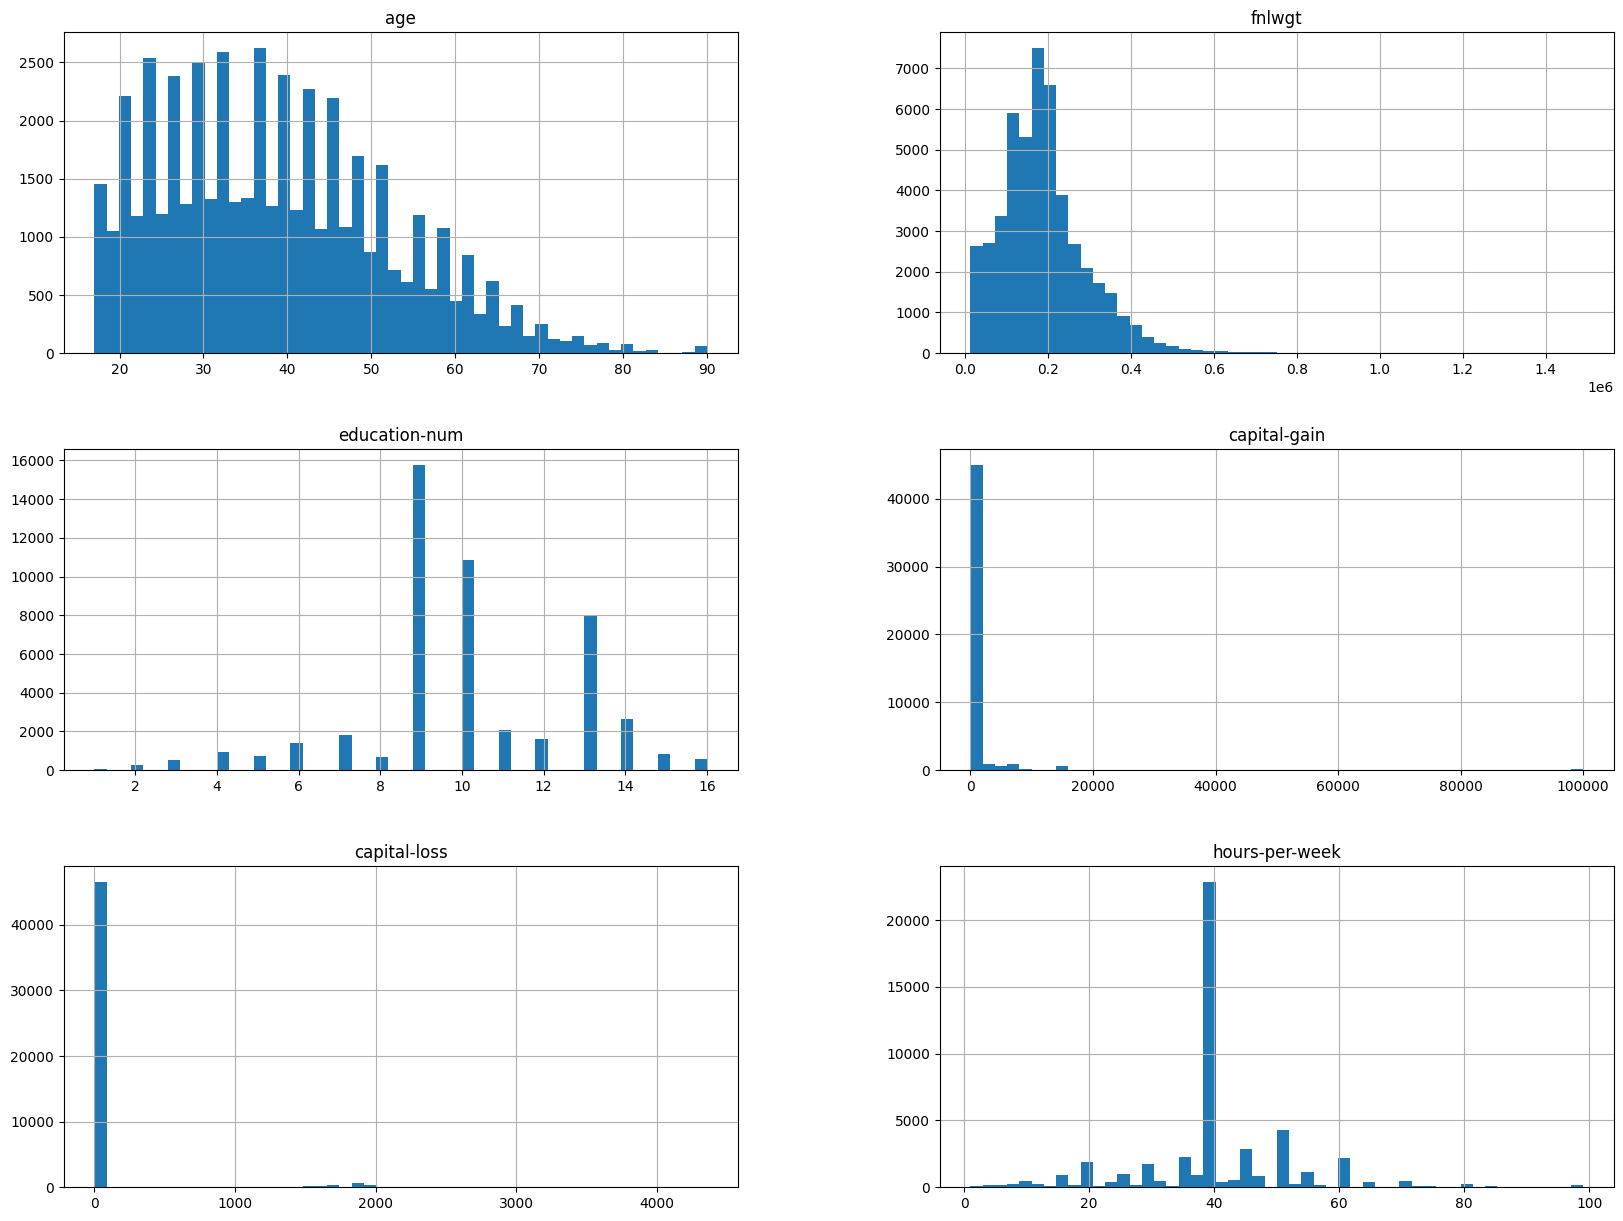

In [4]:
import matplotlib.pyplot as plt 
data_original.hist(bins=50,figsize=(20,15))
plt.show()

In [5]:
vorverarbeitung = Vorverarbeitung(data_train)
#rufe ersetze_durch_mittelwert auf und übergebe eine liste bestehend aus einem Element Spalten.AGE
vorverarbeitung.ersetze_durch_mittelwert([Spalten.AGE])
#vorverarbeitung.erstelle_neue_zeilen([Spalten.SEX, Spalten.RACE, Spalten.NATIVE_COUNTRY])
vorverarbeitung.erstelle_neue_zeilen_v2([Spalten.NATIVE_COUNTRY, Spalten.RACE, Spalten.SEX])
#vorverarbeitung.erstelle_neue_zeilen([Spalten.AGE])
data_train, weights = vorverarbeitung.get_data_and_weights()


Spalte 1/3 | Zeile 1/21774 | erstellt: 17 | Dauer: 0s
Spalte 1/3 | Zeile 1001/21774 | erstellt: 28354 | Dauer: 0s
Spalte 1/3 | Zeile 2001/21774 | erstellt: 56697 | Dauer: 0s
Spalte 1/3 | Zeile 3001/21774 | erstellt: 85861 | Dauer: 0s
Spalte 1/3 | Zeile 4001/21774 | erstellt: 114935 | Dauer: 0s
Spalte 1/3 | Zeile 5001/21774 | erstellt: 143875 | Dauer: 0s
Spalte 1/3 | Zeile 6001/21774 | erstellt: 172783 | Dauer: 0s
Spalte 1/3 | Zeile 7001/21774 | erstellt: 201805 | Dauer: 0s
Spalte 1/3 | Zeile 8001/21774 | erstellt: 231049 | Dauer: 1s
Spalte 1/3 | Zeile 9001/21774 | erstellt: 258981 | Dauer: 0s
Spalte 1/3 | Zeile 10001/21774 | erstellt: 287535 | Dauer: 0s
Spalte 1/3 | Zeile 11001/21774 | erstellt: 316114 | Dauer: 1s
Spalte 1/3 | Zeile 12001/21774 | erstellt: 344865 | Dauer: 0s
Spalte 1/3 | Zeile 13001/21774 | erstellt: 374145 | Dauer: 1s
Spalte 1/3 | Zeile 14001/21774 | erstellt: 402329 | Dauer: 0s
Spalte 1/3 | Zeile 15001/21774 | erstellt: 430915 | Dauer: 0s
Spalte 1/3 | Zeile 16001/217

In [6]:
weights.describe()

count    2.892827e+06
mean     1.250576e-02
std      4.728741e-02
min      2.439024e-03
25%      2.439024e-03
50%      4.878049e-03
75%      1.176471e-02
max      1.000000e+00
Name: weight, dtype: float64

In [7]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2892827 entries, 0 to 2892826
Data columns (total 15 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   age             object
 1   workclass       object
 2   fnlwgt          int64 
 3   education       object
 4   education-num   int64 
 5   marital-status  object
 6   occupation      object
 7   relationship    object
 8   race            object
 9   sex             object
 10  capital-gain    int64 
 11  capital-loss    int64 
 12  hours-per-week  int64 
 13  native-country  object
 14  income          int64 
dtypes: int64(6), object(9)
memory usage: 331.1+ MB


In [8]:
y_train=data_train["income"]
data_train.drop("income", axis=1, inplace=True)
y_test=data_test["income"]
data_test.drop("income", axis=1, inplace=True)

In [9]:
#Alle Spalten vom Typ 'object' in Kategorien umwandeln
data_train['age'] = data_train['age'].astype('int64')
for col in data_train.select_dtypes(include='object').columns:
    print(col)
    data_original[col] = data_original[col].astype('category')
    data_train[col] = data_train[col].astype('category').cat.set_categories(data_original[col].cat.categories)
    data_test[col] = data_test[col].astype('category').cat.set_categories(data_original[col].cat.categories)

workclass
education
marital-status
occupation
relationship
race
sex
native-country


In [10]:
data_train.shape, data_test.shape, y_train.shape, y_test.shape

((2892827, 14), (9045, 14), (2892827,), (9045,))

In [11]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, f1_score

In [12]:
model = xgb.XGBClassifier(enable_categorical=True, n_estimators=40, max_depth=5)
model.fit(data_train,y_train, sample_weight=weights)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=40, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

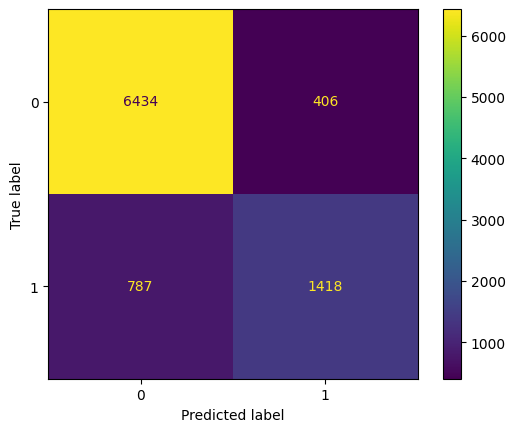

In [13]:
#y_pred = model.predict(X_test)
prediction_xgbc=model.predict_proba(data_test)
lr_probs = prediction_xgbc[:, 1]
y_pred = (lr_probs > 0.5).astype(int)
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred), display_labels=[0, 1])
cm_display.plot()
plt.show()

In [14]:
print("-------------------------------------------------------------------------")
print(f"The accuraccy score is: ------>>  {accuracy_score(y_test,y_pred)}")
print("-------------------------------------------------------------------------")
print(f"The Confusion Matrix is: ------>> \n{confusion_matrix(y_test,y_pred)}")
print("-------------------------------------------------------------------------")
print(f"The Classification Report is: ---->>\n {classification_report(y_test,y_pred)}")
print(f"F1-Score: {f1_score(y_test, y_pred)}")

-------------------------------------------------------------------------
The accuraccy score is: ------>>  0.8681039248203427
-------------------------------------------------------------------------
The Confusion Matrix is: ------>> 
[[6434  406]
 [ 787 1418]]
-------------------------------------------------------------------------
The Classification Report is: ---->>
               precision    recall  f1-score   support

           0       0.89      0.94      0.92      6840
           1       0.78      0.64      0.70      2205

    accuracy                           0.87      9045
   macro avg       0.83      0.79      0.81      9045
weighted avg       0.86      0.87      0.86      9045

F1-Score: 0.7038967485728469
